In [1]:
from src.GEFConstructor import CreateGEF
import matplotlib.pyplot  as plt
import numpy as np
from src.Tools.ModeByMode import ModeByMode
from scipy.interpolate import CubicSpline

In [21]:
ntr = 100
atol = 1e-20
rtol = 1e-3


In [22]:
GEF1 = CreateGEF("Config/SchwingerGEF-Test.py")
sol = GEF1.RunGEF(ntr, tend=120, reachNend=True, printstats=True, atol=atol, rtol=rtol)

No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
The solver aims at reaching t=120
Attempting run with ntr=101
The end of inflation was reached at t=114.9 and N=61.0.
Elapsed time: 92.8133 seconds
To verify a consistent run, checking stability against increasing ntr.
Increasing ntr by 5 to 106.
The solver aims at reaching t=120
Attempting run with ntr=106
The end of inflation was reached at t=114.9 and N=61.0.
Elapsed time: 98.0653 seconds
The run terminated with the following statistics:
nfev : 38768
njev : 0
nlu : 0
status : 1
message : A termination event occurred.
success : True
The following events occured during the run:
True at t=[114.9] or N=[61.005]


In [23]:
GEFComp = CreateGEF("Config/SchwingerGEF+beta25+Mass+OldMagnetic.py")
GEFComp.Unitless()

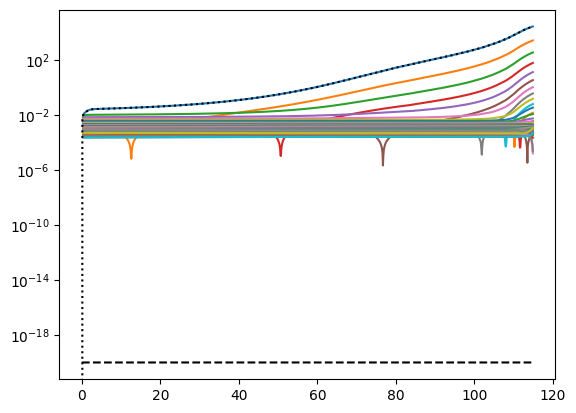

2.048312131188273e-06 25517.61563712905 12457874582.974663


In [24]:
minval = 1
maxval = 1
for i in range(ntr):
    arr = abs(sol.y[GEF1.GaugePos+3*i,:][3:])
    minval = min(min(arr), minval)
    maxval = max(max(arr), maxval)
    #if (arr==0.).any(): print(i)
    plt.plot(sol.t[3:], arr)
plt.yscale("log")
#plt.plot(sol.t, 1e25*sol.y[2], "k--")
plt.plot(sol.t, abs(sol.y[GEF1.GaugePos,:]), "k:")
plt.plot(sol.t, np.ones(sol.t.shape)*atol, "k--")
plt.show()
print(minval, maxval, maxval/minval)

61.65299416632634
61.00461665949814


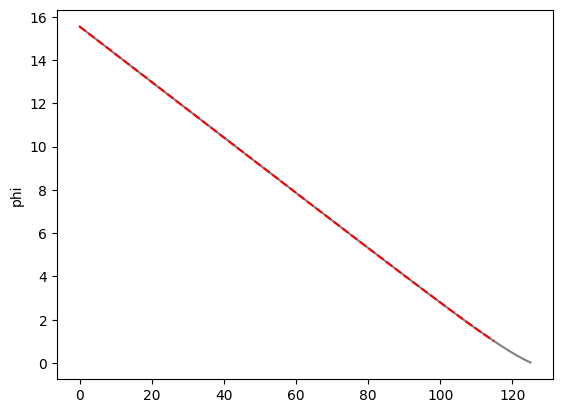

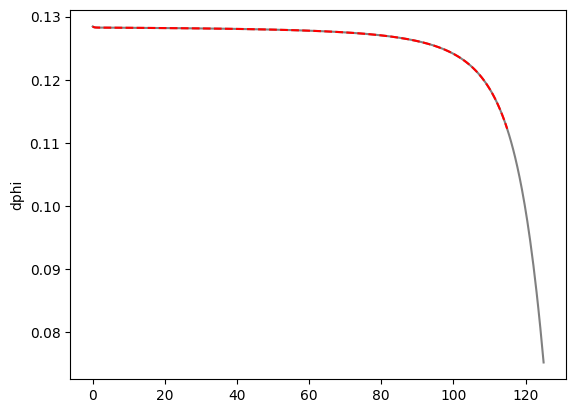

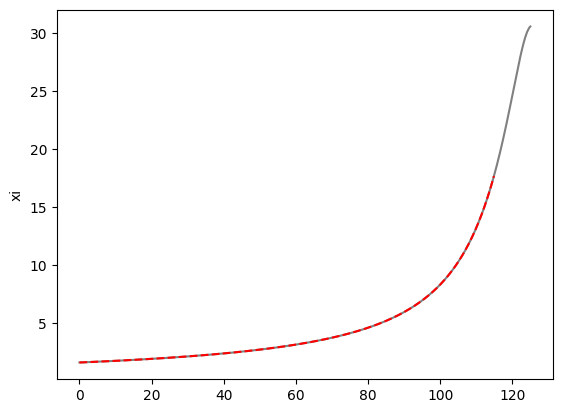

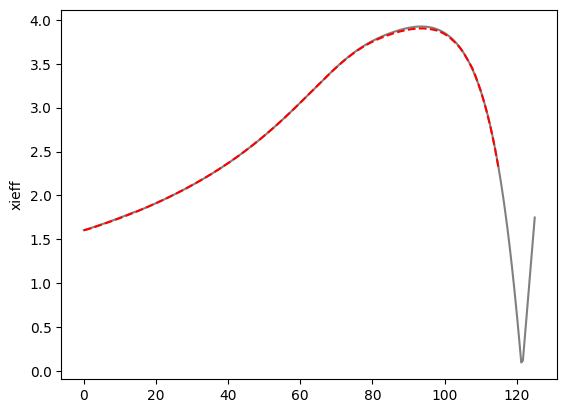

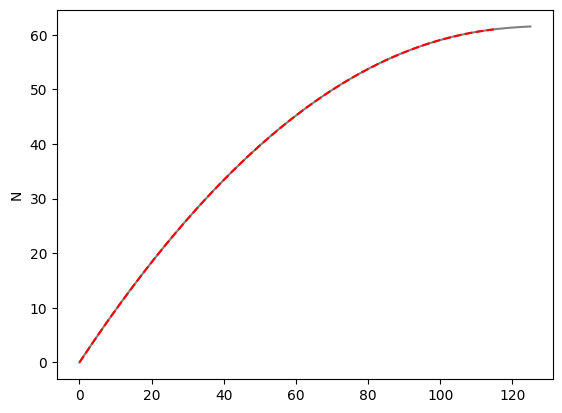

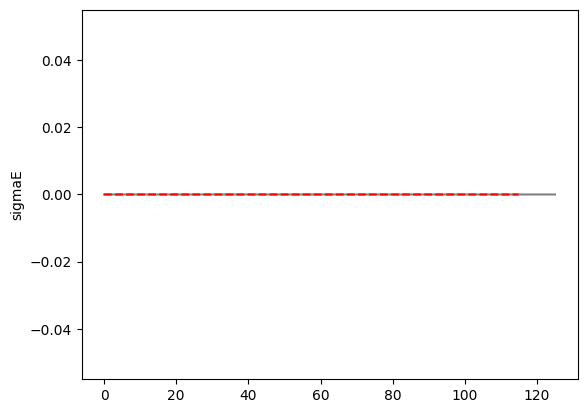

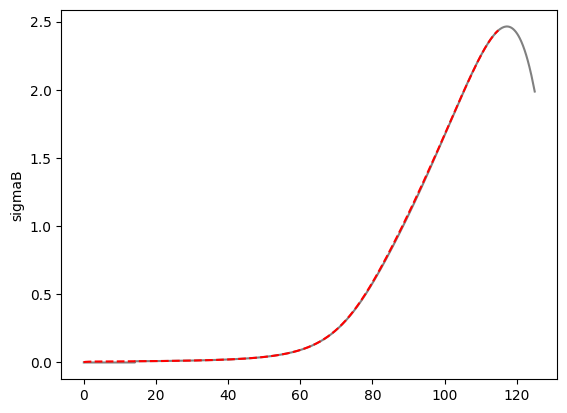

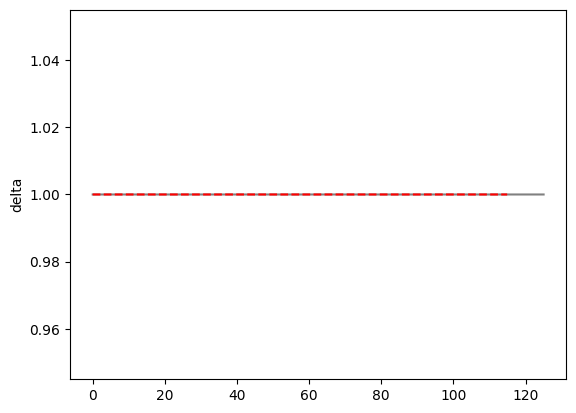

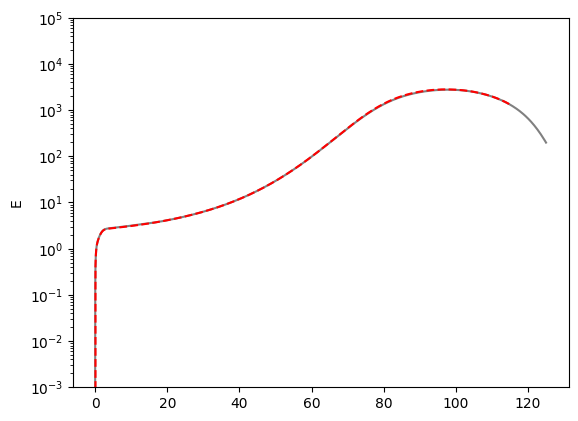

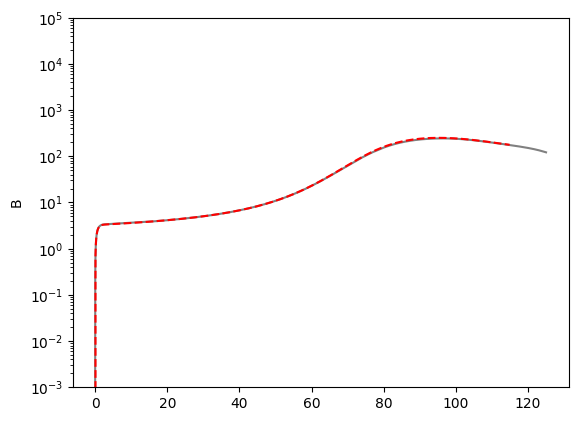

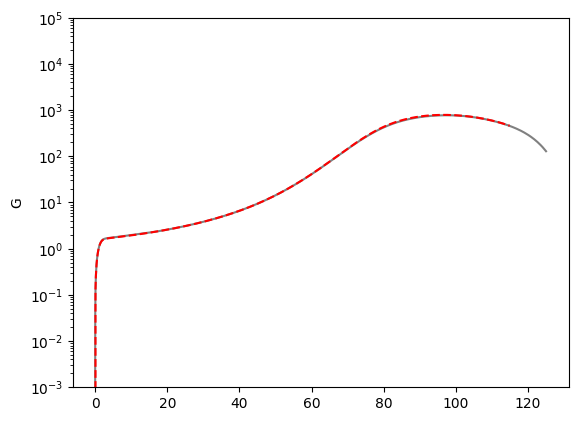

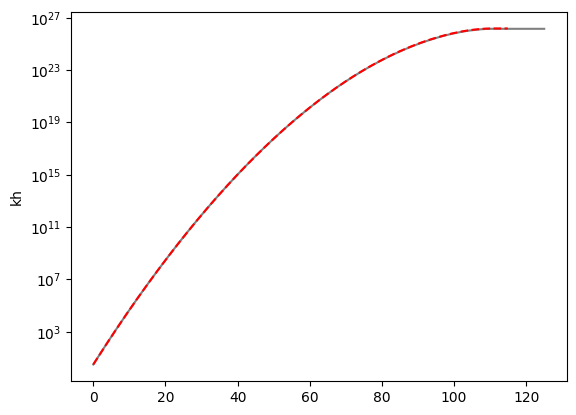

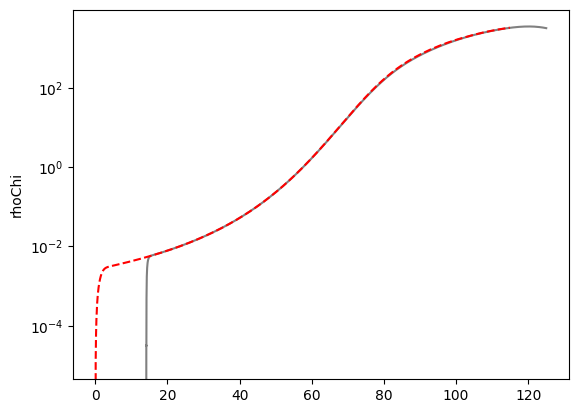

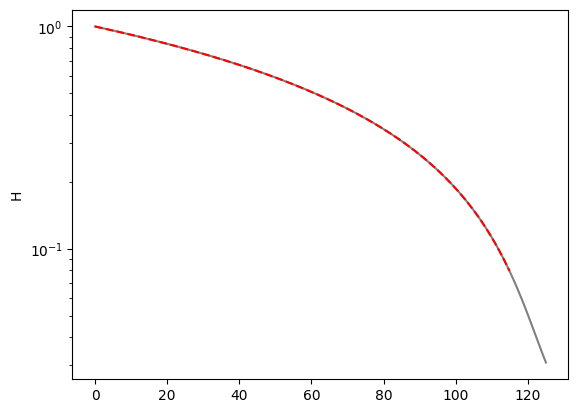

In [26]:
keys = ["phi", "dphi", "xi", "xieff", "N", "sigmaE", "sigmaB", "delta"]
try: 
    sol.t
    sty = "--"
except: sty = "x"
Nend1 = GEFComp.EndOfInflation()
print(Nend1)
Nend2 = GEF1.Nend
print(Nend2)
for key in keys:
    plt.plot(GEFComp.vals["t"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["t"], abs(GEF1.vals[key]), "r"+sty)
    plt.ylabel(key)
    #plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    #plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.show()
keys = ["E", "B", "G", "kh", "rhoChi", "H"]
for key in keys:
    plt.plot(GEFComp.vals["t"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["t"], abs(GEF1.vals[key]), "r"+sty)
    if key in ["E", "B", "G"]:
        plt.ylim(1e-3, 1e5)
    #plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    #plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.yscale("log")
    plt.ylabel(key)
    plt.show()
        


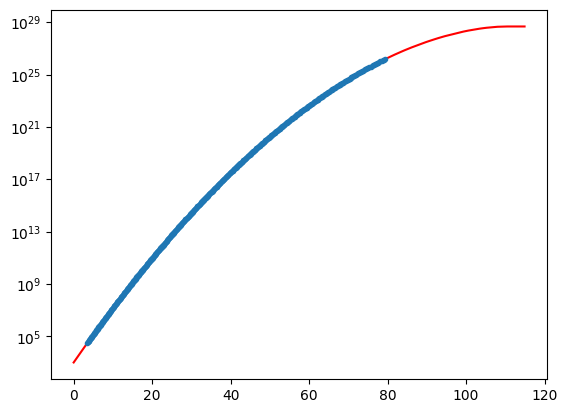

In [ ]:
MbM = ModeByMode(GEF1)
ks = np.logspace(np.log10(MbM.mink), np.log10(MbM.maxk), 500)
ks, tstart = MbM.InitialKTN(ks, mode="k")
plt.plot(GEF1.vals["t"], 10**(5/2)*GEF1.vals["kh"], "r")
plt.plot(tstart, ks, ".")
plt.yscale("log")
plt.show()

Neval = np.arange(GEF1.EndOfInflation(), 5, -0.1)[::-1]
#print(Neval)
teval = CubicSpline(GEF1.vals["N"], GEF1.vals["t"])(Neval)

Ap = []
dAp = []
Am = []
dAm = []
for i, k in enumerate(ks):
    A1, A2, A3, A4 = MbM.ComputeMode(k, tstart[i], teval=teval, atol=1e-5)
    Ap.append(A1)
    Am.append(A3)
    dAp.append(A2)
    dAm.append(A4)

Ap = np.array(Ap)
Am = np.array(Am)
dAp = np.array(dAp)
dAm = np.array(dAm)

EMode = []
BMode = []
GMode = []
#print(Ap[60,:])
#print(ts.size)
for i, t in enumerate(teval):
    Etmp, Btmp, Gtmp = MbM.ComputeEBGnMode(Ap[:,i], Am[:,i], dAp[:,i], dAm[:,i], t, ks)
    EMode.append(Etmp)
    BMode.append(Btmp)
    GMode.append(Gtmp)
    
EMode1 = np.array(EMode)
BMode1 = np.array(BMode)
GMode1 = np.array(GMode)

/tmp/ipykernel_21806/3301587954.py:12: RuntimeWarning: divide by zero encountered in divide
  errE = abs(ER - EMode1)/EMode1
/tmp/ipykernel_21806/3301587954.py:14: RuntimeWarning: divide by zero encountered in divide
  errB = abs(BR - BMode1)/BMode1
/tmp/ipykernel_21806/3301587954.py:16: RuntimeWarning: divide by zero encountered in divide
  errG = abs(GR - GMode1)/GMode1


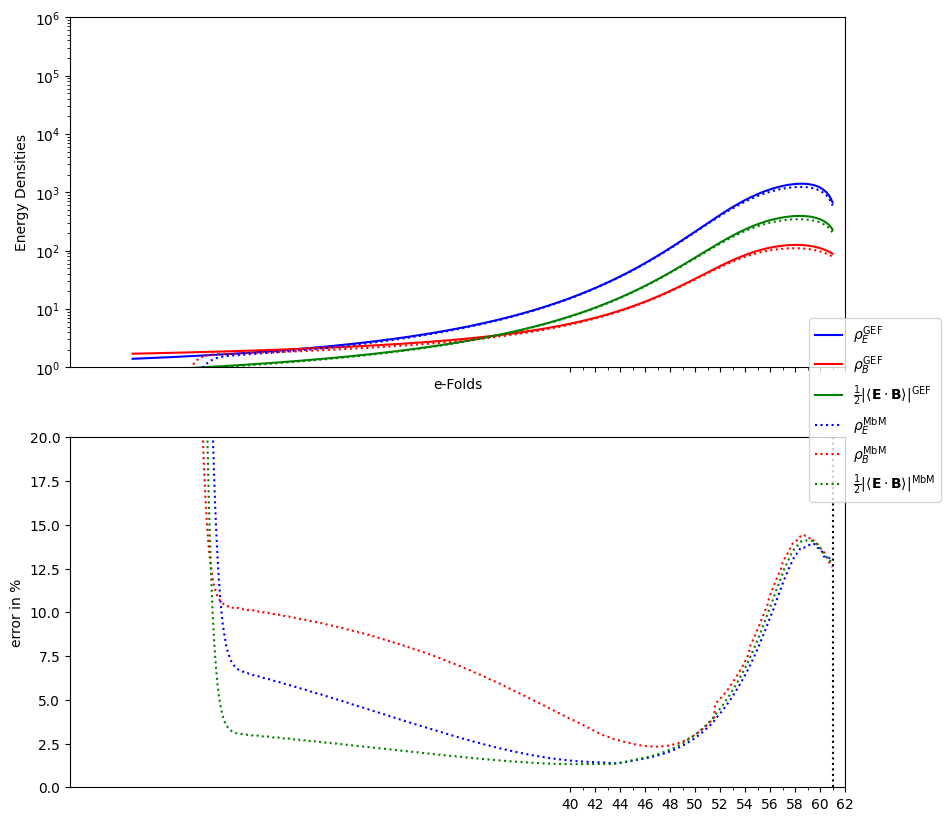

In [30]:
fig, ax = plt.subplots(2,1, figsize=(10,10), sharex=True)

ylims = (1e0, 1e2)


ER = CubicSpline(GEF1.vals["N"], GEF1.vals["E"])(Neval)
BR = CubicSpline(GEF1.vals["N"], GEF1.vals["B"])(Neval)
GR = CubicSpline(GEF1.vals["N"], GEF1.vals["G"])(Neval)
NR = Neval
Nend = GEF1.EndOfInflation()
rhoE = 0.5*ER
errE = abs(ER - EMode1)/EMode1
rhoB = 0.5*BR
errB = abs(BR - BMode1)/BMode1
rhoG = 0.5*abs(GR)
errG = abs(GR - GMode1)/GMode1

xticks = np.arange(36, 57, 2)
xticksmin = np.arange(35, 58, 2)
xticks = np.arange(40, 64, 2)
xticksmin = np.arange(41, 63, 2)
yticks = 10**(np.arange(1, 7))

ax[0].plot(NR, rhoE, "b", label=r"$\rho_E^{\mathrm{GEF}}$")
ax[0].plot(NR, rhoB, "r", label=r"$\rho_B^{\mathrm{GEF}}$")
ax[0].plot(NR, rhoG, "g", label=r"$\frac{1}{2} |\langle \mathbf{E} \cdot \mathbf{B} \rangle|^{\mathrm{GEF}}$")
ax[0].plot(NR, 0.5*EMode1, "b:", label=r"$\rho_E^{\mathrm{MbM}}$")
ax[0].plot(NR, 0.5*BMode1, "r:", label=r"$\rho_B^{\mathrm{MbM}}$")
ax[0].plot(NR, 0.5*abs(GMode1), "g:", label=r"$\frac{1}{2} |\langle \mathbf{E} \cdot \mathbf{B} \rangle|^{\mathrm{MbM}}$")
#ax[0].vlines(Nend, ymin=ylims[0], ymax=ylims[1], colors="k", linestyles="dotted")
ax[0].set_ylim(ylims[0], ylims[1])
ax[0].set_xlim(0, max(Neval))#Nend+1)

ax[0].set_xticks(xticks)
ax[0].set_xticks(xticksmin, minor=True)
ax[0].set_yticks(yticks)
ax[0].set_ylabel("Energy Densities")
ax[1].set_ylabel("error in %")
ax[0].set_xlabel("e-Folds")
ax[0].set_xlabel("e-Folds")
ax[0].set_yscale("log")
ax[1].plot(NR, abs(errE*100), "b:")
ax[1].plot(NR, abs(errB*100), "r:")
ax[1].plot(NR, abs(errG*100), "g:")
ax[1].set_ylim(0.,20)
ax[1].vlines(Nend, ymin=0, ymax=50, colors="k", linestyles="dotted")
#ax[1].set_yticks(np.arange(0,5,1))
lines_labels = [ax[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc=5)
plt.show()

In [49]:
from importlib import reload
import src.Tools.ModeByMode
reload(src.Tools.ModeByMode)
from src.Tools.ModeByMode import ModeByMode

/home/users/rfreiher/Documents/Axion_Inflation/GEF/src/Tools/ModeByMode.py:216: RuntimeWarning: invalid value encountered in log
  x0 = np.log(k[0]) - np.log(x.__khf(t0)) - 5/2*np.log(10)


ValueError: All components of the initial state `y0` must be finite.

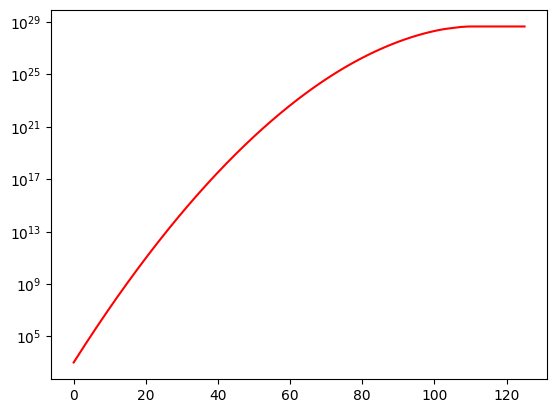

In [ ]:
MbM = ModeByMode(GEFComp)
ks = np.logspace(np.log10(MbM.mink)*10, np.log10(MbM.maxk), 500)
ks, tstart = MbM.InitialKTN(ks, mode="k")
plt.plot(GEFComp.vals["t"], 10**(5/2)*GEFComp.vals["kh"], "r")
plt.plot(tstart, ks, ".")
plt.yscale("log")

Neval = np.arange(GEFComp.EndOfInflation(), 5, -0.1)[::-1]
#print(Neval)
teval = CubicSpline(GEFComp.vals["N"], GEFComp.vals["t"])(Neval)

Ap = []
dAp = []
Am = []
dAm = []
for i, k in enumerate(ks):
    A1, A2, A3, A4 = MbM.ComputeMode(k, tstart[i], teval=teval, atol=1e-5)
    Ap.append(A1)
    Am.append(A3)
    dAp.append(A2)
    dAm.append(A4)

Ap = np.array(Ap)
Am = np.array(Am)
dAp = np.array(dAp)
dAm = np.array(dAm)

EMode = []
BMode = []
GMode = []
#print(Ap[60,:])
#print(ts.size)
for i, t in enumerate(teval):
    Etmp, Btmp, Gtmp = MbM.ComputeEBGnMode(Ap[:,i], Am[:,i], dAp[:,i], dAm[:,i], t, ks)
    EMode.append(Etmp)
    BMode.append(Btmp)
    GMode.append(Gtmp)
    
EMode1 = np.array(EMode)
BMode1 = np.array(BMode)
GMode1 = np.array(GMode)



In [ ]:
print(GEFComp)

ValueError: operands could not be broadcast together with shapes (567,) (561,) 

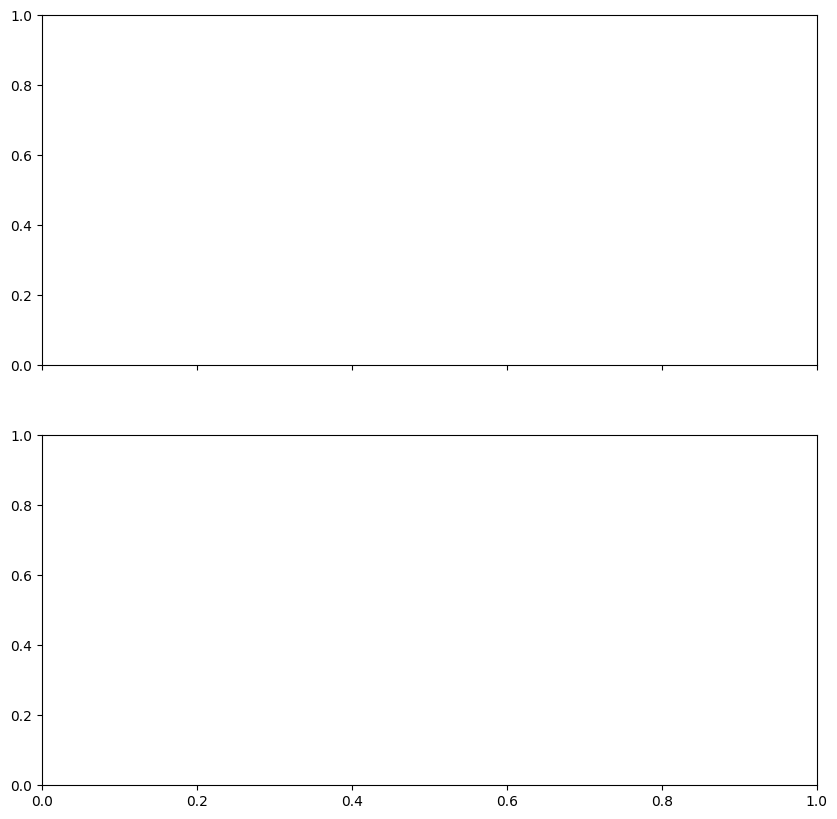

In [36]:
fig, ax = plt.subplots(2,1, figsize=(10,10), sharex=True)

ylims = (1e0, 1e2)


ER = CubicSpline(GEFComp.vals["N"], GEFComp.vals["E"])(Neval)
BR = CubicSpline(GEFComp.vals["N"], GEFComp.vals["B"])(Neval)
GR = CubicSpline(GEFComp.vals["N"], GEFComp.vals["G"])(Neval)
NR = Neval
Nend = GEFComp.EndOfInflation()
rhoE = 0.5*ER
errE = abs(ER - EMode1)/EMode1
rhoB = 0.5*BR
errB = abs(BR - BMode1)/BMode1
rhoG = 0.5*abs(GR)
errG = abs(GR - GMode1)/GMode1

xticks = np.arange(36, 57, 2)
xticksmin = np.arange(35, 58, 2)
xticks = np.arange(40, 64, 2)
xticksmin = np.arange(41, 63, 2)
yticks = 10**(np.arange(1, 7))

ax[0].plot(NR, rhoE, "b", label=r"$\rho_E^{\mathrm{GEF}}$")
ax[0].plot(NR, rhoB, "r", label=r"$\rho_B^{\mathrm{GEF}}$")
ax[0].plot(NR, rhoG, "g", label=r"$\frac{1}{2} |\langle \mathbf{E} \cdot \mathbf{B} \rangle|^{\mathrm{GEF}}$")
ax[0].plot(NR, 0.5*EMode1, "b:", label=r"$\rho_E^{\mathrm{MbM}}$")
ax[0].plot(NR, 0.5*BMode1, "r:", label=r"$\rho_B^{\mathrm{MbM}}$")
ax[0].plot(NR, 0.5*abs(GMode1), "g:", label=r"$\frac{1}{2} |\langle \mathbf{E} \cdot \mathbf{B} \rangle|^{\mathrm{MbM}}$")
#ax[0].vlines(Nend, ymin=ylims[0], ymax=ylims[1], colors="k", linestyles="dotted")
ax[0].set_ylim(ylims[0], ylims[1])
ax[0].set_xlim(0, max(Neval))#Nend+1)

ax[0].set_xticks(xticks)
ax[0].set_xticks(xticksmin, minor=True)
ax[0].set_yticks(yticks)
ax[0].set_ylabel("Energy Densities")
ax[1].set_ylabel("error in %")
ax[0].set_xlabel("e-Folds")
ax[0].set_xlabel("e-Folds")
ax[0].set_yscale("log")
ax[1].plot(NR, abs(errE*100), "b:")
ax[1].plot(NR, abs(errB*100), "r:")
ax[1].plot(NR, abs(errG*100), "g:")
ax[1].set_ylim(0.,10)
ax[1].vlines(Nend, ymin=0, ymax=50, colors="k", linestyles="dotted")
#ax[1].set_yticks(np.arange(0,5,1))
lines_labels = [ax[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc=5)